### Chicago Taxi Market Research

##### Table of contents

- [Introduction](#introduction)<br />
- [Step 1. - Step 3.](#practicum)<br />
- [Step 4. Exploratory data analysis](#exploratory)<br />
    - [4.1 Import the files and study the general information.](#opening_data)<br />
    - [4.2 Top 10 neighborhoods in terms of drop-offs.](#top10_dropoff)<br />
    - [4.3 Graph of the number of rides for each taxi company.](#graph_taxi)<br />
    - [4.4 Top 10 neighborhoods by number of dropoffs.](#graph_top10)<br />
- [Step 5. Testing hypothesis ](#hypothesis)
    - [5.1 Data preprocessing.](#data_preprocessing)<br />
    - [5.2 Testing hypothesis.](#testing_hypothesis)<br />
- [Overall conclusion](#overall_conclusion)

### Introduction<a name="introduction"></a>
Task:<br />
I work as an analyst for the Zuber company, which opens in Chicago. <br /> I need to analyze the transportation market, understand passenger preferences and the impact of weather on ride frequency.<br />

I am going to download the weather data from <a href="https://code.s3.yandex.net/data-analyst-eng/chicago_weather_2017.html">website</a>. Combine them with rides data. Identify the most popular ride destinations. Identify the most popular taxi service in the city. I would also like to test the hypothesis that on rainy days the duration of the ride from Loop to the Airport is longer than on days with good weather.

### Step 1. - Step 3.<a name="practicum"></a>
These steps of the project were carried out on the Yandex.Practicum platform.<br /><br />
**Step 1.** Parsing Weather Data in Chicago in November 2017 from the website.<br />
**Step 2.** Counting the number of rides for each taxi company in November 2017<br />
**Step 3.** Retrieving ride data between O'Hare and Loop neighborhoods from the neighborhoods table.<br />
Weather data processing based on the "weather_conditions" field.


<div class="alert alert-block alert-success">
<b>Success:</b> Thank you for the such detailed project description.
</div>

### Step 4. Exploratory data analysis<a name="exploratory"></a>


#### 4.1. Import the files and study the general information<a name="opening_data"></a>

In [1]:
import pandas   as pd
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format

taxi_path              = 'project_sql_result_01.csv'
dropoff_location_path  = 'project_sql_result_04.csv'
loop_ord_path          = 'project_sql_result_07.csv'
platform_path = 'https://code.s3.yandex.net/learning-materials/data-analyst-eng/'

try:
    taxi     = pd.read_csv(taxi_path)
    dropoff  = pd.read_csv(dropoff_location_path)
    loop_ord = pd.read_csv(loop_ord_path)
except:
    taxi     = pd.read_csv(platform_path+taxi_path)
    dropoff  = pd.read_csv(platform_path+dropoff_location_path)
    loop_ord = pd.read_csv(platform_path+loop_ord_path)

<div class="alert alert-block alert-success">
<b>Success:</b> Good idea to collect all imports and settings in the first cell!
</div>

In [2]:
#analyze the data structure
# taxi
print('Taxi: \n')
print(taxi.info())
print('Unique records - ',len(taxi['company_name'].unique()))
# dropoff
print('\nDropoff: \n')
print(dropoff.info())
print('Unique records - ',len(dropoff['dropoff_location_name'].unique()))

Taxi: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
Unique records -  64

Dropoff: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None
Unique records -  94


Conclusion<br /><br />
As we can see, no missing values or duplicate data were found. The data in the tables is of the correct type. <br /> Some taxi names have a strange look, "id" added to the text name. (Example "3556 - 36214 RC Andrews Cab")

<div class="alert alert-block alert-success">
<b>Success:</b> Data loading and initial analysis were done well. 
</div>

#### 4.2. Top 10 neighborhoods in terms of drop-offs<a name="top10_dropoff"></a>

In [3]:
dropoff.sort_values(by='average_trips', ascending = False)[:10]

dropoff_location_name  average_trips
0                  Loop       10727.47
1           River North        9523.67
2         Streeterville        6664.67
3             West Loop        5163.67
4                O'Hare        2546.90
5             Lake View        2420.97
6            Grant Park        2068.53
7         Museum Campus        1510.00
8            Gold Coast        1364.23
9    Sheffield & DePaul        1259.77

<div class="alert alert-block alert-info">
<b>Improve: </b> As for me it's better to use ".nlargest()" method in this case but your solution is OK too.
</div>

#### 4.3. Graph of the number of rides for each taxi company.<a name="graph_taxi"></a>

In [4]:
print('{:} taxi companies made less than 30 rides per day.'
      .format(taxi[taxi['trips_amount'] < 60]['company_name'].count()))

29 taxi companies made less than 30 rides per day.


After analyzing the data in the **Taxi** table, it was found that out of **64** companies, **29** (**45%**) made less than **30** rides per day. I believe that these companies should be united under the name '**other**'.


In [5]:
taxi.loc[taxi['trips_amount'] < 60, 'company_name'] = 'Other'
#create pivot table
taxi_actual = (
    taxi.pivot_table(index = 'company_name', values = 'trips_amount', aggfunc = 'sum').
    sort_values(by='trips_amount',ascending = False)
)

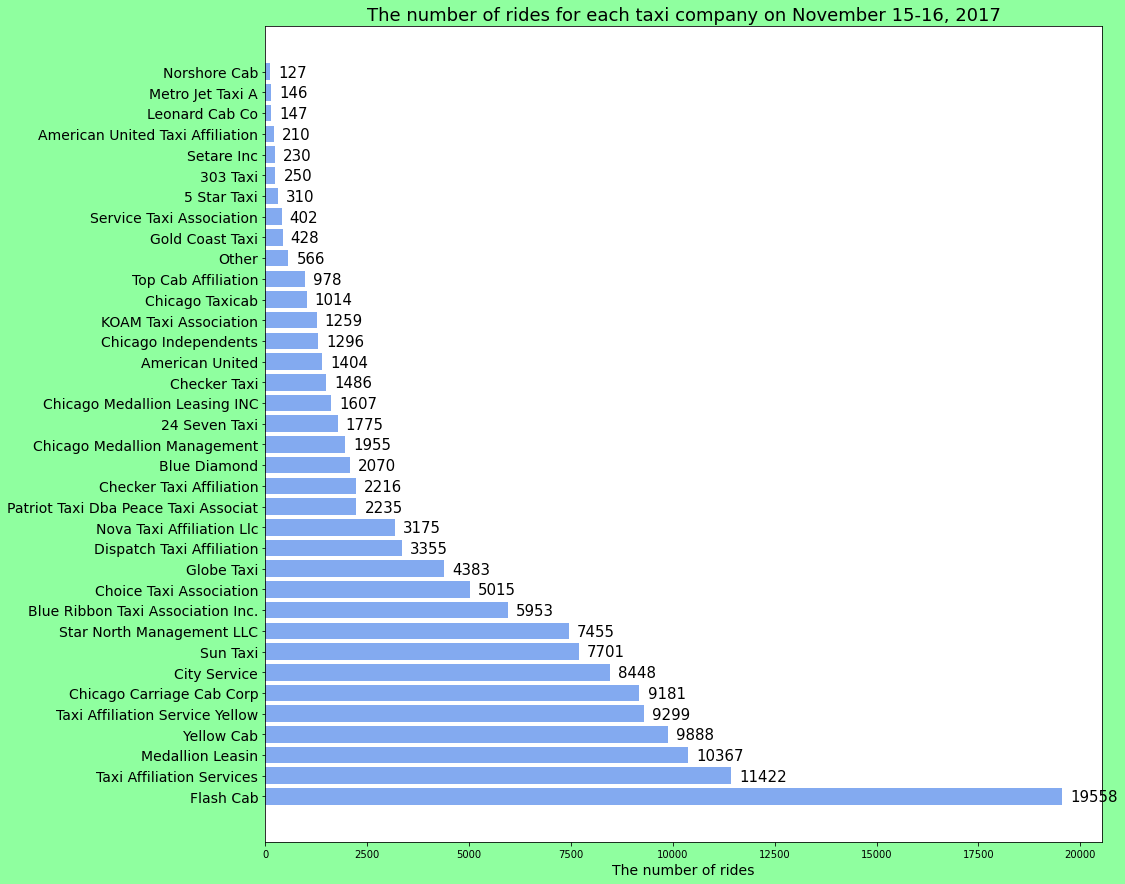

In [6]:
#Make a graph
taxi_actual_dict = list(taxi_actual.index.values.tolist()) 

y_pos = np.arange(len(taxi_actual_dict))
fig, ax = plt.subplots(figsize=(15, 15))
fig.patch.set_facecolor('xkcd:mint green')
plt.barh(y_pos, taxi_actual['trips_amount'], align='center', alpha=0.8, color='cornflowerblue' )
plt.yticks(y_pos, taxi_actual_dict, fontsize=14)
plt.xlabel('The number of rides', fontsize=14)
plt.title('The number of rides for each taxi company on November 15-16, 2017', fontsize=18)
for idx,i in enumerate(ax.patches):
    ax.text(i.get_width()+200, 
            i.get_y()+.15, 
            int(taxi_actual['trips_amount'][idx]), 
            fontsize=15,color='black')
plt.show()

Conclusion<br /><br />

The most popular taxis in **Chicago** is **Flash Cab**, they fill about **2** times more orders than **Taxi Affiliation Services**, which is the second most popular company. After **Flash Cab**, there is a dense group of **7** companies with similar rides figures.

<div class="alert alert-block alert-success">
<b>Success: </b> Good job!  Graph type was selected correctly.
</div>

#### 4.4. Top 10 neighborhoods by number of dropoffs.<a name="graph_top10"></a>

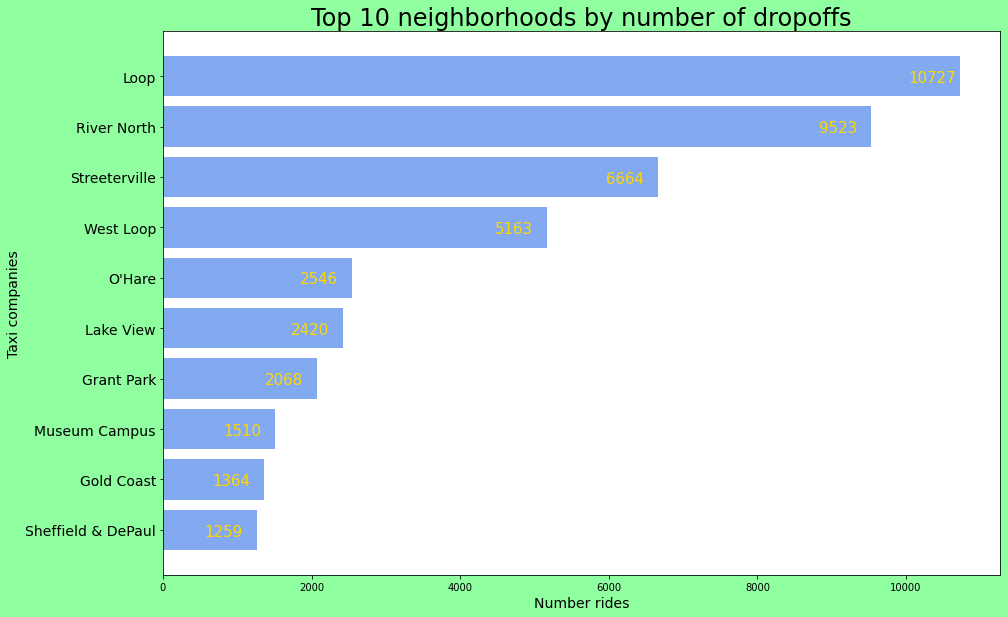

In [7]:
top10_dropoff_popular_location = dropoff.sort_values(by = 'average_trips',
                                                     ascending = False)[:10]
top10_dropoff_popular_location_dict = ( 
    top10_dropoff_popular_location['dropoff_location_name']
    .values.tolist()
)

y_pos = np.arange(len(top10_dropoff_popular_location_dict))

fig, ax = plt.subplots(figsize=(15, 10))
fig.patch.set_facecolor('xkcd:mint green')
plt.barh(y_pos, 
         top10_dropoff_popular_location['average_trips'],
         align='center',
         alpha=0.8, 
         color='cornflowerblue')
plt.yticks(y_pos, top10_dropoff_popular_location_dict, fontsize=14)
plt.xlabel('Number rides', fontsize=14)
plt.ylabel('Taxi companies', fontsize=14)
plt.title('Top 10 neighborhoods by number of dropoffs', fontsize=24)
for idx,i in enumerate(ax.patches):
    ax.text(i.get_width()-700, 
            i.get_y()+.512, 
            int(top10_dropoff_popular_location['average_trips'][idx]), 
            fontsize=15,color='gold')
ax.invert_yaxis() 
plt.show()

#### TOP 10 the most popular drop-off locations.
</a>
<img src="https://ic.pics.livejournal.com/299550/20186542/109692/109692_900.png" alt="Chicago dropoff" height="600" width="900">

**Conclusion:**<br /><br />
As we can see, the most popular locations for the completion of the ride were the city center, park and airport. This is a fairly obvious conclusion, since people from different parts of the city go to places of rest, entertainment and travel. <br />


<div class="alert alert-block alert-success">
<b>Success: </b> Wow! Awesome approach.. I really impressed.
</div>

### Step 5. Testing hypothesis<a name="hypothesis"></a> 

Consider hypothese:<br />

The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

#### 5.1. Data preprocessing.<a name="data_preprocessing"></a>

In [8]:
loop_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


We see that there are **1068** records in the table. No missing records were found, but we need to change the data type of the start_ts column to datetime.

#### Let's convert the data to the required type.

In [9]:
try: 
    loop_ord['start_ts'] = pd.to_datetime(loop_ord['start_ts'], format='%Y.%m.%d %H:%M:%S')
except: 
    print('Data conversion failed ((')
loop_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


#### Let's check if all rides were made on Saturday.

In [10]:
loop_ord['weekday'] = loop_ord['start_ts'].dt.weekday
loop_ord['weekday'].value_counts()

5    1068
Name: weekday, dtype: int64

As we can see, all rides were completed on Saturday

#### Let's remove anomalous values

In [11]:
loop_ord['duration_seconds'].describe()

count   1068.00
mean    2071.73
std      769.46
min        0.00
25%     1438.25
50%     1980.00
75%     2580.00
max     7440.00
Name: duration_seconds, dtype: float64

As we can see the minimum ride time is **0** seconds. We need to remove the anomalies in the "duration_seconds" column. <br /> <br />
Distance between Loop and airport **18** miles.<br />
A car cannot cover this distance in less than **14** minutes.
(provided that the taxi driver will drive at an average speed of **80 mph**, with a permitted **65 mph**)<br />
Delete records where the ride time is less than **14 minutes** (**840 sec**)

In [12]:
loop_ord = loop_ord.loc[(loop_ord['duration_seconds'] > 840)].reset_index(drop=True)


Let's divide the data into 2 groups, depending on the "weather_conditions" and remove the outliers.

In [13]:
loop_ord_bad = loop_ord.query('weather_conditions == "Bad"')
loop_ord_good = loop_ord.query('weather_conditions == "Good"')

In [14]:
#outlier function
def outliers_lower_upper(name_df,column):
    q1 = name_df[column].quantile(0.25)
    q3 = name_df[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)  


In [15]:
outliers_bad  = outliers_lower_upper(loop_ord_bad,'duration_seconds')
outliers_good = outliers_lower_upper(loop_ord_good,'duration_seconds')
loop_ord_bad  = loop_ord_bad.loc[(loop_ord_bad['duration_seconds'] > outliers_bad[0]) 
                                 & (loop_ord_bad['duration_seconds'] < outliers_bad[1])]
outliers_good = loop_ord_good.loc[(loop_ord_good['duration_seconds'] > outliers_good[0]) 
                                 & (loop_ord_good['duration_seconds'] < outliers_good[1])]

Let's check the number of records in each table

In [16]:
print('{:} records in the "Bad_weather_conditions" table'.format(len(loop_ord_bad)))
print('{:} records in the "Good_weather_conditions" table'.format(len(loop_ord_good)))

177 records in the "Bad_weather_conditions" table
880 records in the "Good_weather_conditions" table


##### Let's find out the variance for each samples.<br />

In [17]:
print('The variance "Bad_weather_conditions" is {:.02f}'.format(np.var(loop_ord_bad['duration_seconds'])))
print('The variance "Good_weather_conditions" is {:.02f}'.format(np.var(loop_ord_good['duration_seconds'])))

The variance "Bad_weather_conditions" is 446454.77
The variance "Good_weather_conditions" is 546281.00


Let's build graphs Q - Q (quantile-quantile) to compare probability distributions.

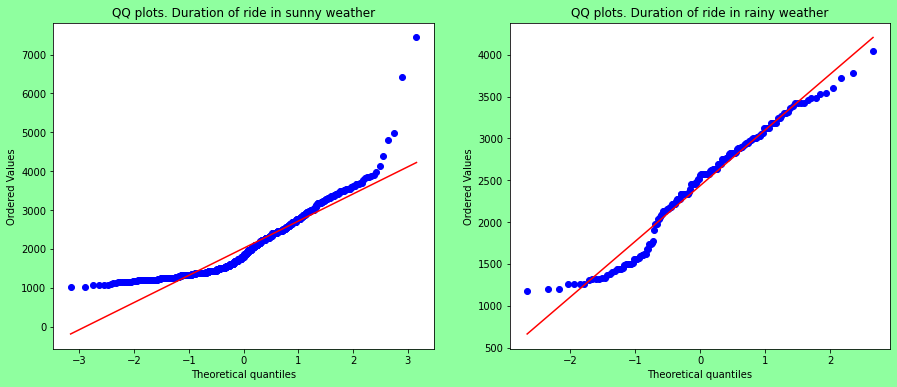

In [18]:
fig, ax = plt.subplots(figsize=(15, 6))
fig.patch.set_facecolor('xkcd:mint green')
ax1 = plt.subplot(121)
res = st.probplot(loop_ord_good['duration_seconds'], dist="norm", plot= plt)
plt.title("QQ plots. Duration of ride in sunny weather")

ax2 = plt.subplot(122)
res = st.probplot(loop_ord_bad['duration_seconds'], dist="norm", plot= plt)
plt.title("QQ plots. Duration of ride in rainy weather")
plt.show()

The plotted graphs inform us that the data has a distribution of the **"Right skewed"** type

Conclusion:<br /><br />
We have verified that each table has more than 50 records.<br /> Found that the distribution in both tables is normal.<br />
The variances is not equal.


<div class="alert alert-block alert-success">
<b>Success: </b> Correct.
</div>

#### 5.2.  Testing hypothesis.<a name="testing_hypothesis"></a><br /><br />
**Hypothese Null**: Average rides times from Loop to O'Hare International Airport are the same on Saturdays, regardless of the weather.<br />
**Hypothese alternative**: Average travel time from Loop to O'Hare International Airport are different on Saturdays, depending on the weather.
<br /> <br /> 
In this case: Hypothesis on the Equality of Two Population Means.

Each sample has more than **50** records, which means the samples are large enough to test hypotheses.

Set **alpha = 0.05**, since we are evaluating a hypothesis for a business problem.

<div class="alert alert-block alert-success">
<b>Success:</b> Both null and alternative hypotheses were formulated correctly.
</div>

In [19]:
# from scipy import stats as st
alpha = 0.05 #business case 
# Let's check our hypothesis
result = st.stats.ttest_ind(
    loop_ord_bad['duration_seconds'],
    loop_ord_good['duration_seconds'],
    equal_var = False)
print(result.pvalue)

if (result.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

1.4501152346139674e-12
We reject the null hypothesis


Conclusion<br/>
The hypothesis that the average ride time from Loop to O'Hare International Airport is the same on Saturdays, regardless of the weather has not been confirmed.

<div class="alert alert-block alert-success">
<b>Success:</b> Testing was done in the right way.
</div>

### Step 6. Overall conclusion <a name="overall_conclusion"></a>

After analyzing the received data, I filled in the missing values and removed outliers and anomalies.
<br /><br />
After analyzing the data, I came to the conclusion the most popular locations for the completion of the ride were the city center, park and airport.The most popular taxis in Chicago is Flash Cab, they fill about 2 times more orders than Taxi Affiliation Services, which is the second most popular company. After Flash Cab, there is a dense group of 7 companies with similar rides figures.
<br /><br />
We also tested the hypothesis that the average ride time from Loop to the airport is different depending on the weather. We were unable to confirm the hypothesis that the time is the same.


<div class="alert alert-block alert-success">
<b>Success:</b> Glad to see the overall conclusion at the end of the project.
</div>